# Microsoft AI School - Machine Learning


# Sales Analysis Based on Advertising Cost by Different Advertising Platforms

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## UX Modification

<Axes: >

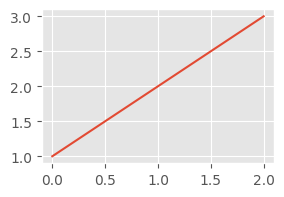

In [3]:
plt.style.use("ggplot")
pd.Series([1,2,3]).plot(figsize=(3,2))

## Scrape advertisement sales data from Git

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')

## Install additional library

In [5]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 10.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.1 MB 11.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.1 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 7.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 8.0 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.6 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   -- ------------------------------------- 2.4/43.6 MB 11.5 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/43.6 M

## Check obtained dataframe

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Understanding the Data

* Advertising cost for TV, Radio, and Newspaper are in thousands.
* Number of sales are in thousands.

### Sales Visualization Based on Advertising Cost Across Different Platforms.

#### scatterplot

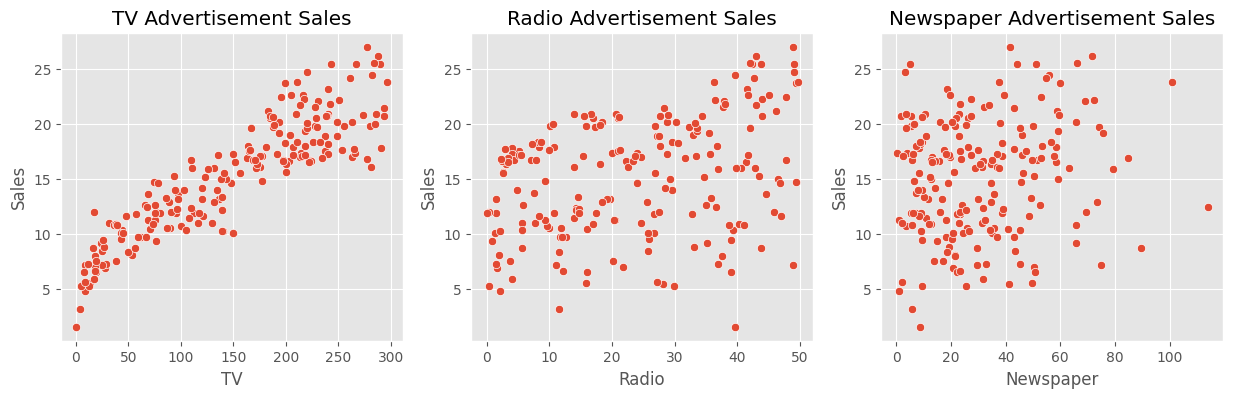

In [15]:
plt.figure(figsize=(15, 4))

# Platform: TV
plt.subplot(1, 3, 1)    # First ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "TV", y = "Sales")
plt.title("TV Advertisement Sales")

# Platform: Radio
plt.subplot(1, 3, 2)    # Second ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "Radio", y = "Sales")
plt.title("Radio Advertisement Sales")

# Platform: Newspaper
plt.subplot(1, 3, 3)    # Third ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "Newspaper", y = "Sales")
plt.title("Newspaper Advertisement Sales")

plt.show()

#### regplot

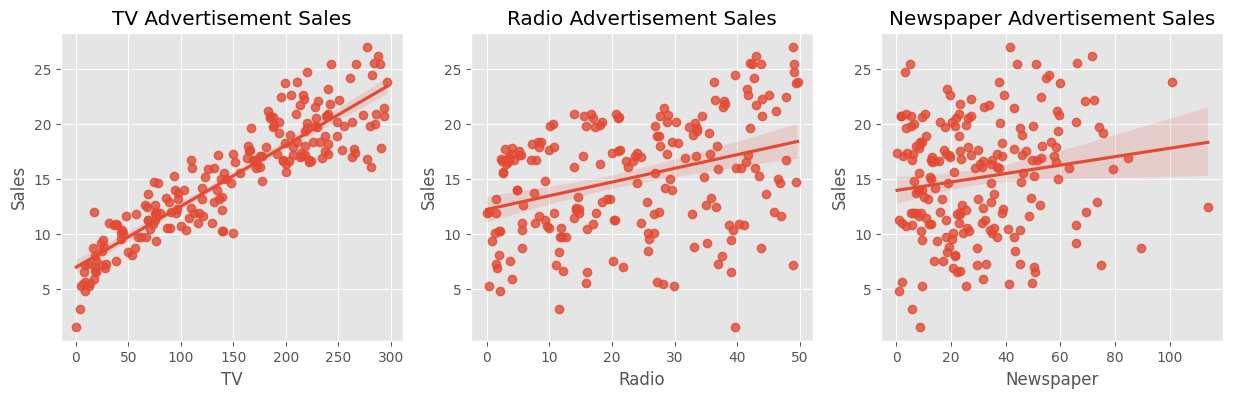

In [16]:
plt.figure(figsize=(15, 4))

# Platform: TV
plt.subplot(1, 3, 1)    # First ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "TV", y = "Sales")
plt.title("TV Advertisement Sales")

# Platform: Radio
plt.subplot(1, 3, 2)    # Second ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "Radio", y = "Sales")
plt.title("Radio Advertisement Sales")

# Platform: Newspaper
plt.subplot(1, 3, 3)    # Third ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "Newspaper", y = "Sales")
plt.title("Newspaper Advertisement Sales")

plt.show()

### Correlation Coefficient

In [18]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


* TV shows the strongest sales correlation while Newspaper shows the weakest correlation.

<Axes: >

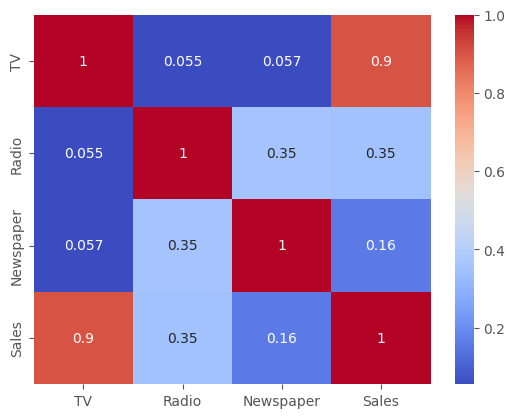

In [21]:
# Correlation Coefficient Heatmap
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True)

## Simple Linear Regression

* Required Library: scikit-learn

### Predict sales based on the number of TV advertisements

In [27]:
# Initialzie variables
X = df[["TV"]]  # independet variables are of 2-dimensional
y = df["Sales"]

#### Split training and test dataset

import

In [26]:
from sklearn.model_selection import train_test_split

data split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

visualization

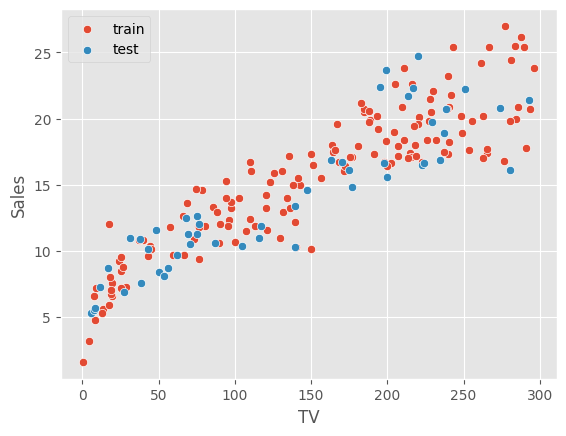

In [37]:
sns.scatterplot(x = X_train["TV"], y = y_train, label = "train")
sns.scatterplot(x = X_test["TV"], y = y_test, label = "test");

## Model Development

imports

In [38]:
from sklearn.linear_model import LinearRegression

Model Creation

In [39]:
# Linear Regression model
lr = LinearRegression()

Model Training

In [40]:
lr.fit(X = X_train, y = y_train)

LinearRegression()

## Model Evaluation

imports

In [41]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

prediction value for test data

In [42]:
pred = lr.predict(X_test)

Model evaluation using loss metrics

In [45]:
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2 : {r2:.2f}")

MSE : 5.51
RMSE : 2.35
MAE : 1.87
R2 : 0.80


Compare model prediction with the real value

In [46]:
df_pred = pd.DataFrame({"X_test": X_test["TV"],
                        "y_test": y_test,
                        "y_pred": pred})

df_pred["error"] = df_pred["y_test"] - df_pred["y_pred"]
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


Error Manual Calculation

In [49]:
my_mae = abs(df_pred["error"]).mean()
my_mse = np.square(df_pred["error"]).mean()
my_rmse = np.sqrt(mse)
my_rss = np.square(df_pred["y_test"] - df_pred["y_pred"]).sum()
my_tss = np.square(df_pred["y_test"] - df_pred["y_test"].mean()).sum()
my_r2 = 1 - (my_rss/my_tss)

print(f"MSE : {my_mse:.2f}")
print(f"RMSE : {my_rmse:.2f}")
print(f"MAE : {my_mae:.2f}")
print(f"R2 : {my_r2:.2f}")

MSE : 5.51
RMSE : 2.35
MAE : 1.87
R2 : 0.80


## Model Training Result

regression coefficient

In [57]:
w = lr.coef_
print("Regression Coefficient: ", w)

Regression Coefficient:  [0.05538653]


intercept

In [58]:
b = lr.intercept_
print("Intercept: ", b)

Intercept:  7.098853680118275


Linear Regression Equation

In [61]:
print(f"{w[0]} * TV + {b}")

0.05538653085519158 * TV + 7.098853680118275


Visualizing actual value and predicted value

<Axes: xlabel='TV', ylabel='Sales'>

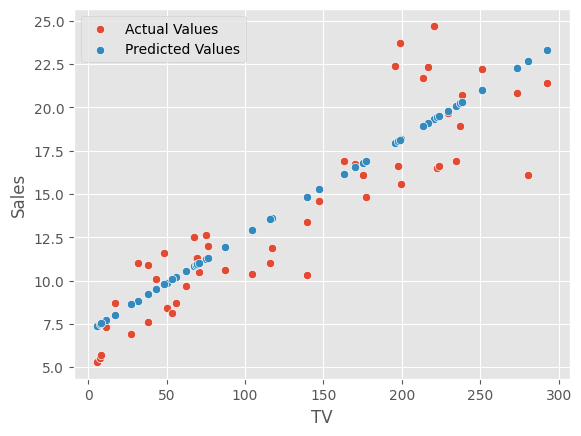

In [63]:
sns.scatterplot(x = X_test["TV"], y = y_test, label = "Actual Values")
sns.scatterplot(x = X_test["TV"], y = pred, label = "Predicted Values")

Visualizing the difference between the actual values and predicted values

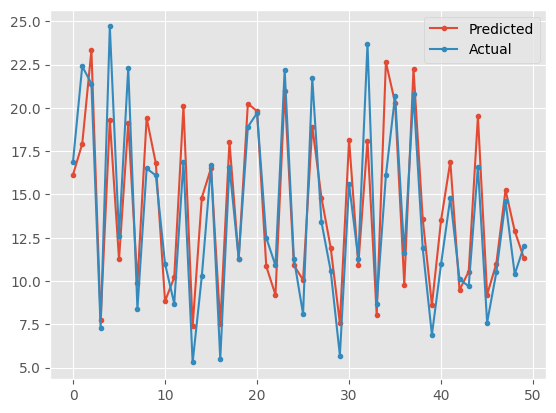

In [73]:
plt.plot(pred, marker = ".", label = "Predicted")
plt.plot(np.array(y_test), marker = ".", label = "Actual")
plt.legend();

## Predicting New Data

In [76]:
TV = 100    # in thousands
lr.predict([[TV]])

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.63750677])

In [78]:
# Plugging in values in the equation
print(w * TV + b)

[12.63750677]
